In [87]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [88]:
data_dir = Path('./Data_Files')

In [89]:
# Params
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [90]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [91]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [92]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()
df33 = change(df33)
df33 = convert(df33)

df34 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)
# df34 = df34[:129*198]

df35 = pd.read_csv(data_dir7 / "150cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
# df35 = df35[:211*129]
df35 = change(df35)
df35 = convert(df35)


data_dir8 = Path("./finale/") 
df36 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
df36 = change(df36)
df36 = convert(df36)
# df36 = df36[:129*198]

df37 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df37 = df37[df37['frequency'] != "clocktime"]
df37 = df37.dropna()
df37 = change(df37)
df37 = convert(df37)
# df37 = df37[:129*198]

In [93]:
df34

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [94]:


df36[:129*210]

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [95]:
data_dir9 = Path('./Aug12')

df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df38 = df38[df38['frequency'] != "clocktime"]
df38 = df38.dropna()
df38 = convert(df38)
df38 = df38[:-10]
dftest1 = df38[-50:]
df38 = df38[:-50]


df39 = pd.read_csv(data_dir9 / "v1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df39 = df39[df39['frequency'] != "clocktime"]
df39 = df39.dropna()
df39 = convert(df39)
df39 = df39[:-10]
dftest0_5 = df39[-50:]
df39 = df39[:-50]



df40 = pd.read_csv(data_dir9 / "v1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df40 = df40[df40['frequency'] != "clocktime"]
df40 = df40.dropna()
df40 = convert(df40)
df40 = df40[:-15]
dftest1_5 = df40[-50:]
df40 = df40[:-50]


df41 = pd.read_csv(data_dir9 / "v1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df41 = df41[df41['frequency'] != "clocktime"]
df41 = df41.dropna()
df41 = convert(df41)
df41 = df41[:-10]
dftest2 = df41[-50:]
df41 = df41[:-50]

# df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df38 = df38[df38['frequency'] != "clocktime"]
# df38 = df38.dropna()
# df38 = convert(df38)

In [96]:
df38

array([[6.75248207e+04, 2.89011927e+04, 1.79804800e+02, ...,
        1.42315600e+02, 5.13654000e+01, 4.06000000e+00],
       [3.10801520e+03, 1.51114530e+03, 3.95596500e+02, ...,
        7.65062000e+01, 5.17596000e+01, 3.15000000e+00],
       [1.51328740e+03, 1.17330160e+03, 4.81010100e+02, ...,
        4.14626000e+01, 4.63846000e+01, 3.08000000e+00],
       ...,
       [4.26051790e+03, 2.28511990e+03, 5.31192800e+02, ...,
        4.15434000e+01, 7.68383000e+01, 2.82000000e+00],
       [9.55093700e+02, 2.88313600e+02, 3.42620400e+02, ...,
        1.01128600e+02, 1.46897500e+02, 2.69000000e+00],
       [1.27290060e+03, 7.19125300e+02, 1.51297200e+02, ...,
        1.52714800e+02, 1.37690100e+02, 2.95000000e+00]])

In [97]:
df39

array([[7.46939946e+04, 3.23727107e+04, 4.98730100e+02, ...,
        1.81583300e+02, 9.38874000e+01, 5.97000000e+00],
       [2.99705830e+03, 1.11389490e+03, 2.78978500e+02, ...,
        1.56829000e+02, 1.30692200e+02, 6.89000000e+00],
       [4.14477600e+02, 2.24770800e+02, 2.45985700e+02, ...,
        8.88909000e+01, 1.53278100e+02, 6.77000000e+00],
       ...,
       [6.67103860e+03, 3.34679150e+03, 2.36394400e+02, ...,
        3.19451700e+02, 2.19012600e+02, 4.15000000e+00],
       [1.24956100e+03, 9.05505900e+02, 6.27858400e+02, ...,
        6.17283000e+01, 2.30712700e+02, 3.29000000e+00],
       [1.42266580e+03, 1.69216520e+03, 1.10233990e+03, ...,
        7.14422000e+01, 1.53809100e+02, 3.44000000e+00]])

In [98]:
df40[:10*700]
df40

array([[7.18052191e+04, 3.06204344e+04, 1.58075300e+02, ...,
        6.05669000e+01, 8.18163000e+01, 4.15000000e+00],
       [4.02816740e+03, 1.95124160e+03, 3.12837800e+02, ...,
        9.04382000e+01, 9.71537000e+01, 4.32000000e+00],
       [1.32188730e+03, 6.33675500e+02, 1.78411000e+02, ...,
        5.70151000e+01, 7.55806000e+01, 4.32000000e+00],
       ...,
       [5.72201200e+02, 4.56676900e+02, 1.41252000e+02, ...,
        4.74705000e+01, 2.20510000e+00, 3.51000000e+00],
       [1.70001400e+03, 8.90911600e+02, 3.35005300e+02, ...,
        4.80638000e+01, 3.05706000e+01, 3.66000000e+00],
       [7.00272000e+02, 5.45133600e+02, 2.33964600e+02, ...,
        3.59359000e+01, 4.79580000e+01, 3.51000000e+00]])

In [99]:
df41[:10*33]
df41

array([[6.62204522e+04, 2.82888909e+04, 2.56816700e+02, ...,
        5.05667000e+01, 6.65650000e+00, 3.74000000e+00],
       [2.37845130e+03, 7.47708100e+02, 2.11342300e+02, ...,
        4.93574000e+01, 2.52591000e+01, 4.41000000e+00],
       [1.99851100e+02, 2.72417900e+02, 8.52300000e+01, ...,
        3.28351000e+01, 3.50869000e+01, 5.87000000e+00],
       ...,
       [2.02589410e+03, 1.18492590e+03, 3.86693200e+02, ...,
        4.13489000e+01, 2.11533000e+01, 3.51000000e+00],
       [2.01580220e+03, 5.85634000e+02, 5.21715400e+02, ...,
        3.80278000e+01, 4.88439000e+01, 3.36000000e+00],
       [4.63727200e+02, 4.63303900e+02, 3.24717100e+02, ...,
        4.03463000e+01, 2.96394000e+01, 3.36000000e+00]])

In [100]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
# df = np.concatenate([df29, df30, df31, df32, df33, df34, df35, df36, df37])

# df = np.concatenate([df39, df38, df40, df41])

df = np.concatenate([df39, df38, df40, df41, df32, df34, df35, df36, df37, df29, df30, df31])

In [101]:
# df = df[df.columns[1:2]]


In [102]:
data = df


In [103]:
X = data[:,:-1]

X = X[:, :7]
X.shape

(3726, 7)

In [104]:
y = data[:, -1]
y.shape


(3726,)

In [105]:
print (X.shape, y.shape)

(3726, 7) (3726,)


In [106]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.17


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, min_samples_split=5, n_estimators=500)

In [109]:
from joblib import dump, load
dump(reg, "flowSense.joblib")

['flowSense.joblib']

In [110]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [111]:
print(y_pred[:5])
print(y_test[:5])

[3.45362422 3.03367833 3.63001632 4.9675333  3.58343503]
[3.66 3.9  4.06 4.15 4.77]


In [112]:
print(y_train_pred[:5])
print(y_train[:5])

[ 3.1953255  30.48429825  3.10655159  3.42723523 28.19254662]
[ 2.95 30.78  2.57  3.29 28.44]


In [113]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  3.732107803855862
(746,)
Test Reg score:  0.914935084993277


In [114]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.1095527849936177
Train Reg score:  0.99743804727103


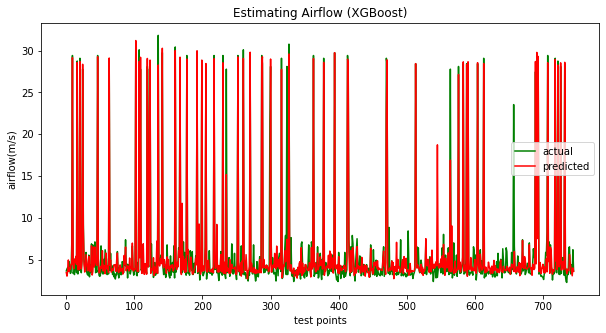

In [115]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'g', label="actual")
plt.plot(y_pred, 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

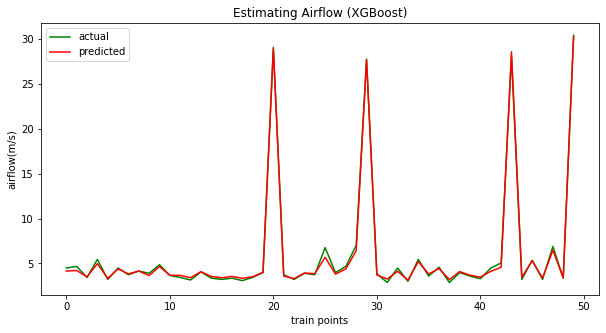

In [116]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")



Mean Squared Error:  1.9843531227074265
Regression Score:  -7.548133550413668


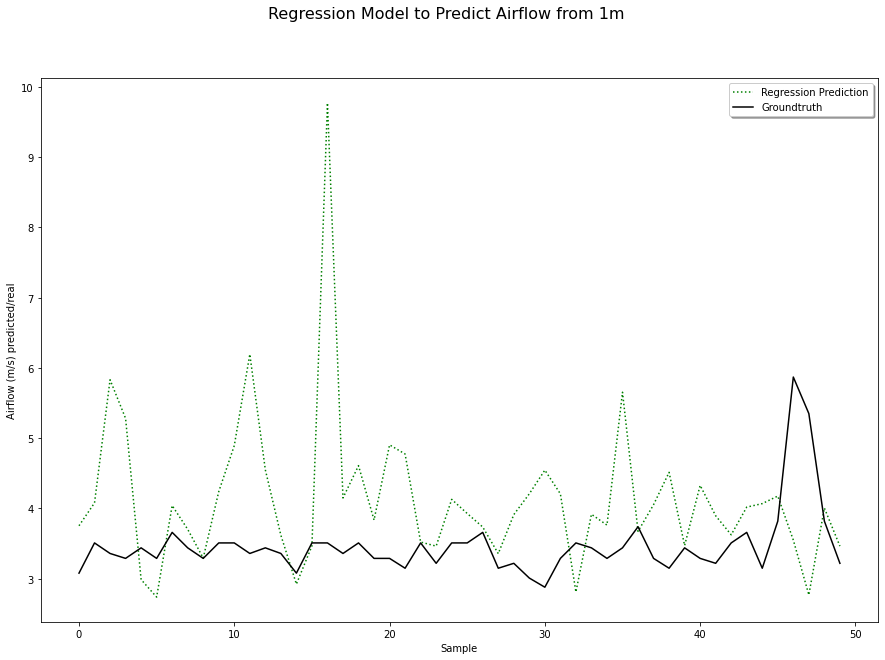

In [117]:

X = dftest1[:,:-1]
X = X[:, :7]
X.shape

y = dftest1[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()



Mean Squared Error:  1.9066807415382985
Regression Score:  -56.890476728755715


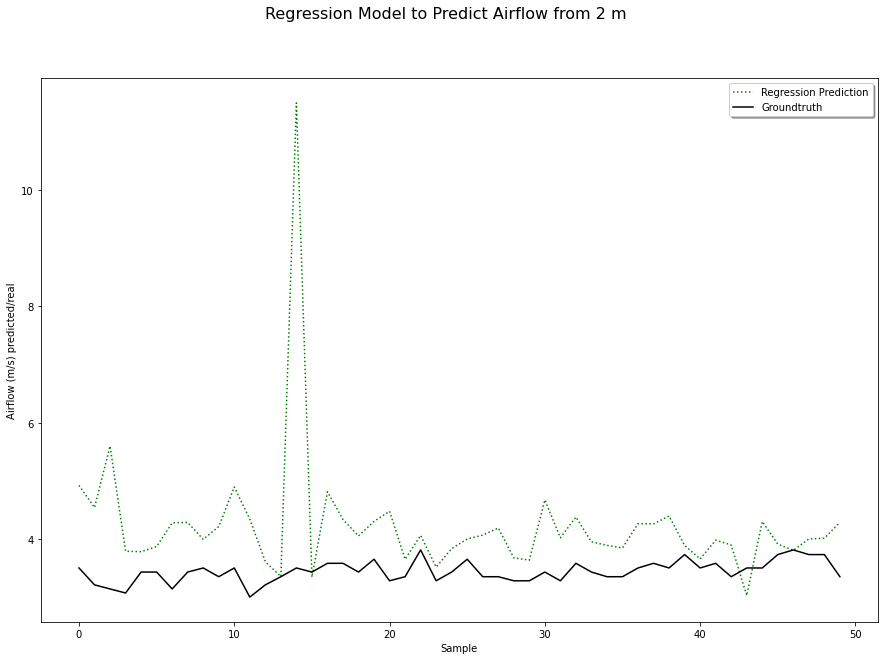

In [118]:

X = dftest2[:,:-1]
X = X[:, :7]
X.shape

y = dftest2[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 2 m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  2.6968389996813418
Regression Score:  -4.199505984052319


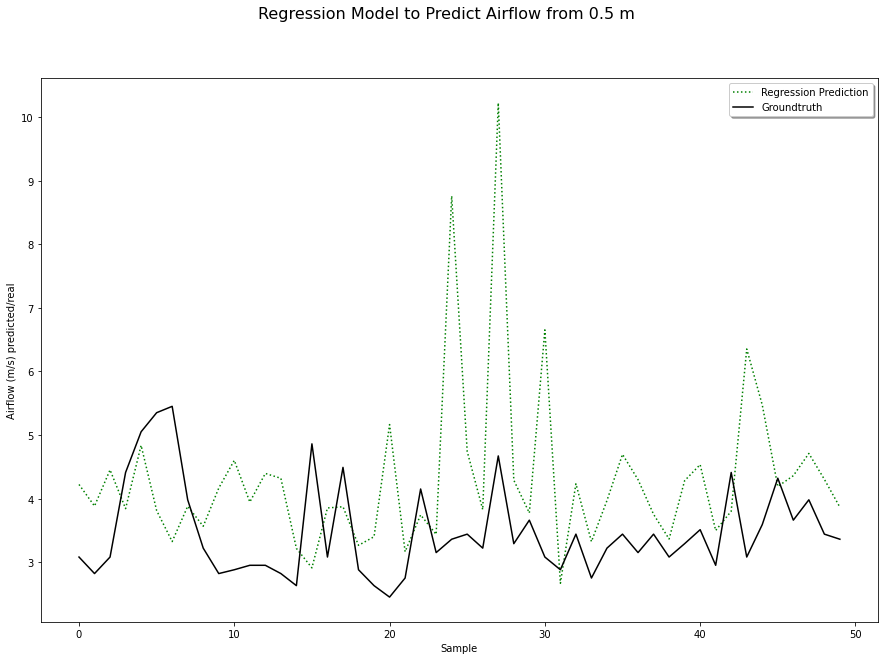

In [119]:

X = dftest0_5[:,:-1]
X = X[:, :7]
X.shape

y = dftest0_5[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 0.5 m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  1.4107008918535076
Regression Score:  -4.536633960449877


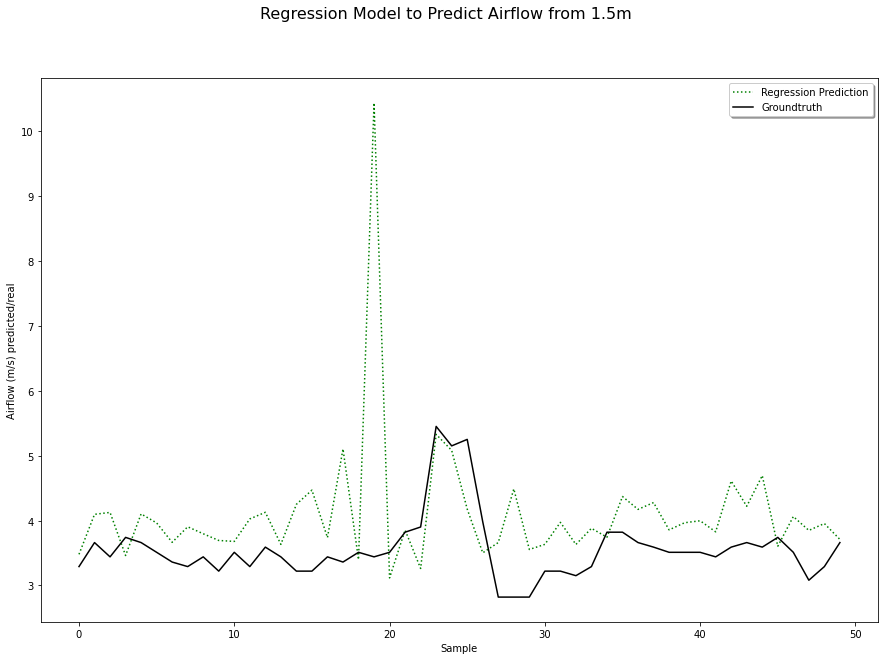

In [120]:

X = dftest1_5[:,:-1]
X = X[:, :7]
X.shape

y = dftest1_5[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 1.5m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  1.9843531227074265
Regression Score:  -7.548133550413668


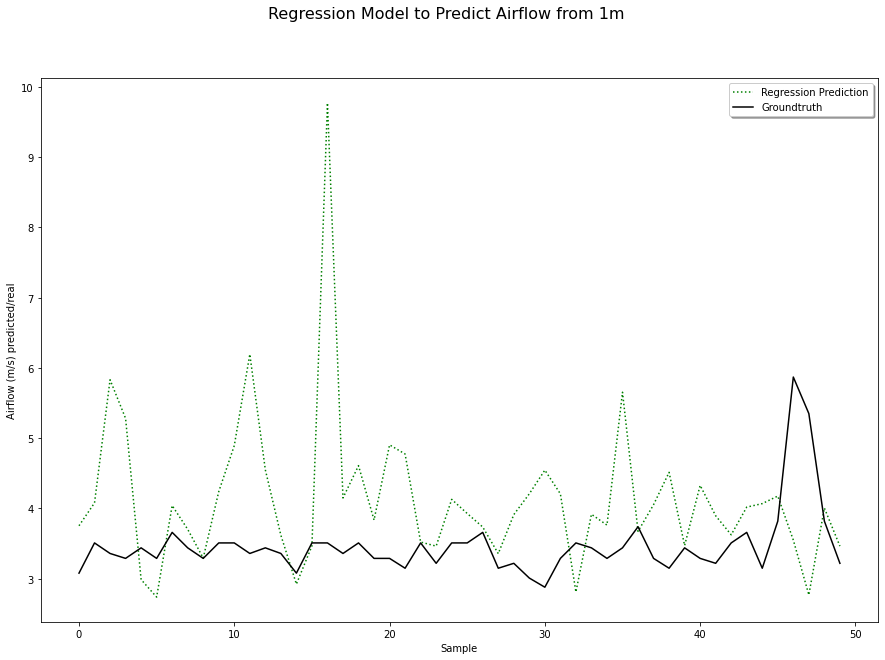

In [121]:

X = dftest1[:,:-1]
X = X[:, :7]
X.shape

y = dftest1[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()